In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O 'jamboree.csv'

--2024-02-21 19:23:08--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.117, 18.164.173.58, 18.164.173.110, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘jamboree.csv’

jamboree.csv        100%[===================>]  15.80K  --.-KB/s    in 0s      

2024-02-21 19:23:08 (47.5 MB/s) - ‘jamboree.csv’ saved [16176/16176]



In [ ]:
df=pd.read_csv('jamboree.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.drop('Serial No.', axis=1,inplace=True)

# **Define Problem Statement and perform Exploratory Data Analysis**

Jamboree is kind of a consultancy services which helps students to get admission in foreign universities. Recently these people launched a new feature in which new students cam come to their website and after entering their GRE score, TOEFL score, University rating and other factors they can find our their chances of getting into their desired university.

**Our Goal:**
We need to find our what are the features that are important to predict the chances of getting to their desired universities. We need to find our the best model that helps us to predict one's chances of admission given the rest of the variables.

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.shape

(500, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


There are no missing values in the data.

In [ ]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [ ]:
df['Chance of Admit '].value_counts()

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit , Length: 61, dtype: int64

# **Univariate-Bivariate Aanalysis**

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<ipython-input-199-e3db8b38f587>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])
<ipython-input-199-e3db8b38f587>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GRE Score'])
<ipython-input-199-e3db8b38f587>:12: UserWarning: 

`distplot` is a deprecated function and will be rem

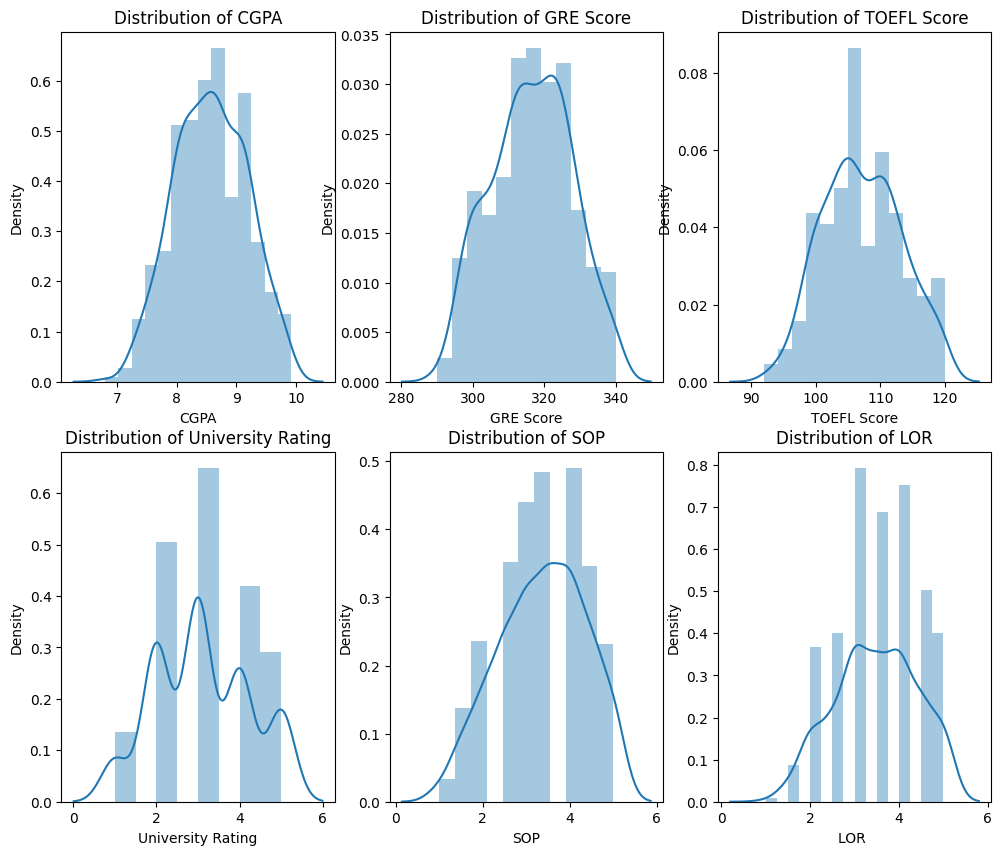

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
sns.distplot(df['CGPA'])
plt.title('Distribution of CGPA')

plt.subplot(2,3,2)
sns.distplot(df['GRE Score'])
plt.title('Distribution of GRE Score')

plt.subplot(2,3,3)
sns.distplot(df['TOEFL Score'])
plt.title('Distribution of TOEFL Score')

plt.subplot(2,3,4)
sns.distplot(df['University Rating'])
plt.title('Distribution of University Rating')

plt.subplot(2,3,5)
sns.distplot(df['SOP'])
plt.title('Distribution of SOP')

plt.subplot(2,3,6)
sns.distplot(df['LOR '])
plt.title('Distribution of LOR')

plt.show()

From the above univariate graphs it is clear that the students with vatried merits have applied for the university and all the distributions follow a normal distribution.

Let us see the relation between the scores of the students.

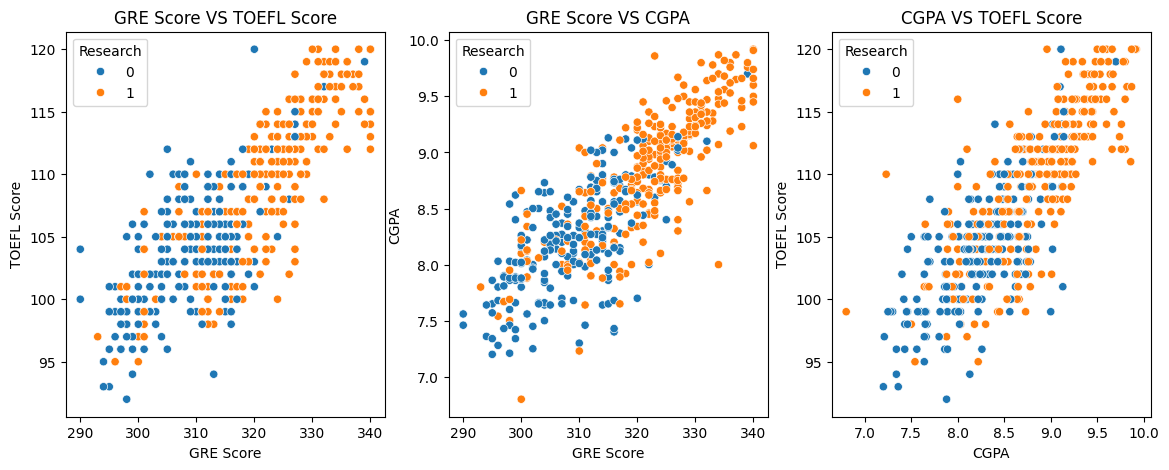

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df,x='GRE Score',y='TOEFL Score',hue='Research')
plt.title('GRE Score VS TOEFL Score')

plt.subplot(1,3,2)
sns.scatterplot(data=df,x='GRE Score',y='CGPA',hue='Research')
plt.title('GRE Score VS CGPA')

plt.subplot(1,3,3)
sns.scatterplot(data=df,x='CGPA',y='TOEFL Score',hue='Research')
plt.title('CGPA VS TOEFL Score')

plt.show()


We can see a positive corrilation between all the three factors.
Students with low TEOFL score also have low CGPA and GRE Score and students with high TOEFL score have also scored good marks in GRE as well as CGPA which also makes sense as a bright student will score good marks in all the three and a not so bright one will reflect the same in all the three exams.
Although there are some outliers bit overall it is a positive corrilation.
Also we can see that students with research experience generally score higher markes in all the three exams as compared to other students.

<Axes: >

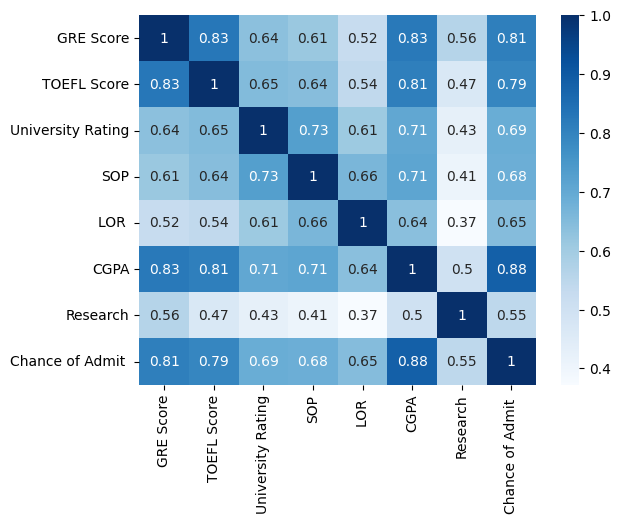

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

By the above heatmap it is clear that all the features of the given data are positively corrilated.

# **Model Building**

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#creating x and y
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [ ]:
#splitting the data between test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train_columns=X_train.columns

In [ ]:
#standardization
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [ ]:
X_train_std

array([[-1.57580062, -1.8268654 , -0.98202281, ..., -1.61280999,
        -1.19548746, -1.16912955],
       [ 0.44276882,  1.07676172,  1.61936211, ...,  0.53760333,
         0.56491948,  0.8553372 ],
       [-0.25934229, -0.53636445,  0.75223381, ...,  1.61280999,
         0.69531999, -1.16912955],
       ...,
       [-0.1715784 , -1.34292754, -0.98202281, ..., -0.53760333,
        -1.14658727, -1.16912955],
       [-1.04921729,  0.75413649, -0.1148945 , ...,  0.        ,
         0.09221761, -1.16912955],
       [-0.08381451,  0.59282387,  0.75223381, ...,  1.61280999,
        -0.08708309, -1.16912955]])

In [ ]:
X_train=pd.DataFrame(X_train_std,columns=X_train_columns)

In [ ]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.575801,-1.826865,-0.982023,-1.907946,-1.612810,-1.195487,-1.169130
1,0.442769,1.076762,1.619362,1.112549,0.537603,0.564919,0.855337
2,-0.259342,-0.536364,0.752234,1.615965,1.612810,0.695320,-1.169130
3,-0.698162,-1.342928,-0.114895,0.609133,0.537603,-0.054483,-1.169130
4,1.057116,0.915449,1.619362,1.615965,1.075207,1.396223,0.855337


In [ ]:
y_train

271    0.54
192    0.86
288    0.82
256    0.76
276    0.89
       ... 
340    0.75
487    0.79
206    0.63
299    0.71
433    0.71
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train.values)
y_pred=model_lr.predict(std.transform(X_test))
print('Linear Regression', (np.sqrt(mean_squared_error(y_test, y_pred))))

Linear Regression 0.05776947263348242


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
model_lr=Lasso(alpha=0.1)
model_lr.fit(X_train,y_train.values)
y_pred=model_lr.predict(std.transform(X_test))
print('Lasso', (np.sqrt(mean_squared_error(y_test, y_pred))))

Lasso 0.11491073163210659


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
model_lr=Ridge(alpha=1)
model_lr.fit(X_train,y_train.values)
y_pred=model_lr.predict(std.transform(X_test))
print('Lasso', (np.sqrt(mean_squared_error(y_test, y_pred))))

Lasso 0.057783627571194734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Above are the results without removing multicolinearity.

# **Linear Regression using Statsmodel**

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train.values,X_train)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          5.48e-143
Time:                        19:23:13   Log-Likelihood:                 558.02
No. Observations:                 400   AIC:                            -1100.
Df Residuals:                     392   BIC:                            -1068.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7250      0.00

In [ ]:
X_train_new=X_train.drop(columns='SOP')       #as the coeff of SOP is very less

In [ ]:
model_1=sm.OLS(y_train.values,X_train_new).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     304.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          3.01e-144
Time:                        19:23:13   Log-Likelihood:                 558.02
No. Observations:                 400   AIC:                            -1102.
Df Residuals:                     393   BIC:                            -1074.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7250      0.00

# **VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_train_new.columns[:]

Index(['const', 'GRE Score', 'TOEFL Score', 'University Rating', 'LOR ',
       'CGPA', 'Research'],
      dtype='object')

In [ ]:
def cal_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  vif=vif.sort_values(by='VIF',ascending=False)
  return vif

In [ ]:
cal_vif(X_train_new,[])

,features,VIF
5,CGPA,4.592008
1,GRE Score,4.312552
2,TOEFL Score,3.738476
3,University Rating,2.411039
4,LOR,1.884298
6,Research,1.427516
0,const,1.000000


VIF score of all the features looks fine, hence we can go ahead with the predictions.

In [ ]:
X_test_std=std.transform(X_test)
X_test=pd.DataFrame(X_test_std,columns=X_train_columns)
X_test=sm.add_constant(X_test)
X_test.drop('SOP',axis=1,inplace=True)

In [ ]:
X_test

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,0.881588,0.592824,0.752234,1.075207,0.662720,0.855337
1,1.0,-0.434870,0.270199,-0.982023,0.537603,0.695320,-1.169130
2,1.0,-2.365676,-1.181615,-1.849151,-1.612810,-1.684489,-1.169130
3,1.0,-0.259342,-0.375052,-0.114895,-1.075207,-0.478285,-1.169130
4,1.0,0.793824,0.915449,1.619362,0.537603,1.314722,0.855337
...,...,...,...,...,...,...,...
95,1.0,0.706060,0.431511,0.752234,0.537603,0.597520,0.855337
96,1.0,0.706060,0.431511,0.752234,0.537603,0.124818,0.855337
97,1.0,-0.083815,0.270199,-0.114895,-0.537603,0.271518,-1.169130
98,1.0,0.442769,0.431511,-0.114895,1.612810,0.075918,0.855337


Prediction:

In [ ]:
pred=model_1.predict(X_test)

In [ ]:
print('Mean Squared Error: ', mean_squared_error(y_test,pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))

Mean Squared Error:  0.0033379626256294175
Mean Absolute Error:  0.04463525899638035


**Checking Mean of Residuals - It should be close to 0**

In [ ]:
residuals=y_test.values-pred
mean_res=np.mean(residuals)
print('Mean of Residuals: ', mean_res)

Mean of Residuals:  0.00418904462036615


Close to 0

**Test for Homoscedasticity**

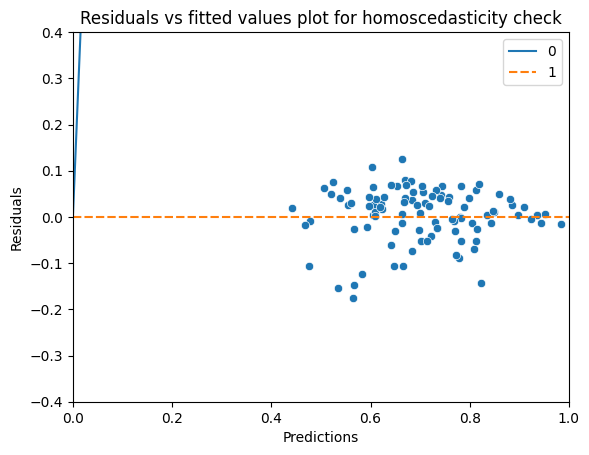

In [ ]:
p=sns.scatterplot(x=pred,y=residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p=sns.lineplot(([0,26],[0,0]),color='orange')
p=plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

As we can see from the above scatterplot, the data is homoscedastic.

**Check for Normality of residuals**

<ipython-input-240-d7f8cefad97d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


Text(0.5, 1.0, 'Normality check for residuals')

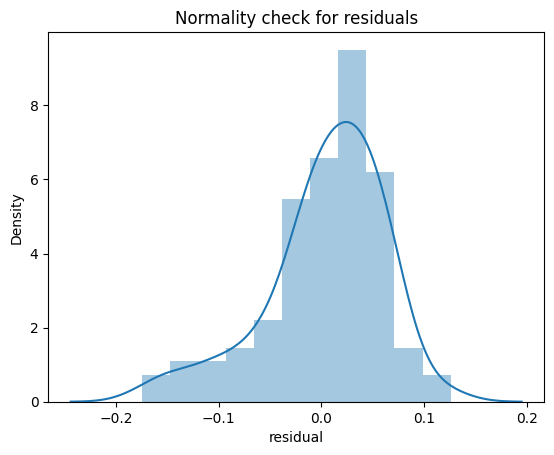

In [ ]:
sns.distplot(residuals,kde=True)
plt.xlabel('residual')
plt.title('Normality check for residuals')

Plotting y and y_pred to understand the averall spread.

Text(0.5, 1.0, 'y-y_pred spread')

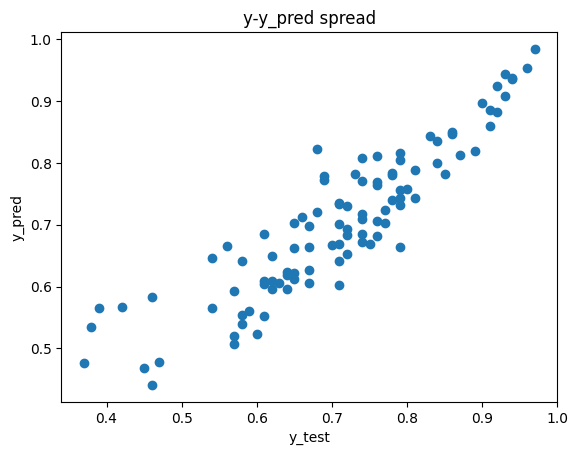

In [ ]:
plt.scatter(y_test.values,pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y-y_pred spread')

# **Recommendation:**



*   As we can see from the y-y_pred spread graph that our model is performing good for students having above 70% chances of admission but for the students who are having below 70% chances our model is giving error of about 10%-15%. In order to rectify this we need more training data for students having below 70% chances for admission so that we can train our model well.
*   We can also use other advance modeling techniques in order to train our model for this particular given data.

